In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import glob
import tensorflow as tf

In [4]:
import SimpleITK as sitk
import nibabel as nib

In [70]:
vol = nib.load("D:/lumor_segementation/kits19-master/data/case_00000/imaging.nii.gz")
seg = nib.load("D:/lumor_segementation/kits19-master/data/case_00000/segmentation.nii.gz")

In [71]:
print("shape of vol(肿瘤原图)   : ",vol.shape)
print("shape of seg(语义分割图) : ",seg.shape)

shape of vol(肿瘤原图)   :  (611, 512, 512)
shape of seg(语义分割图) :  (611, 512, 512)


In [72]:
#现在的数据类型 --> NiftilImage
vol

In [73]:
#将vol 与 seg 转换为我们能使用的array数组形式
vol = vol.get_data()
seg = seg.get_data()

D:\Anaconda\Anaconda_setup\envs\malning\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
D:\Anaconda\Anaconda_setup\envs\malning\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
#根据红字提示可知，get_data()方法显然也抄的numpy的方法
#显然这表示numpy的方法此时也能在vol,seg上使用

In [75]:
#根据官方文档的要求
#vol的数据类型要求为np.float32（64不需要，内存显存也放不下）
#seg的数据类型要求为np.unit8 (只是2分类，int足够)
vol = vol.astype(np.float32)
seg = seg.astype(np.int32)

In [76]:
#查看某张肾脏图的数组
vol[100]
#首尾全为负最大是因为图像的边角本来就是全黑的

array([[-1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03,
        -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03,
        -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03,
        -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03,
        -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03,
        -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03,
        -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03,
        -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03,
        -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03,
        -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03,
        -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03,
        -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03,
        -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03,
        -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03, -1.024e+03,
        -1.024e+03, -1.024e+03, -1.024e+03, -1.0

In [77]:
seg[100]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [82]:
#根据官方文档的提示：segmentation语义分割图中
#    (value)       (meaning)
#      0           background
#      1            tumor(肿瘤)

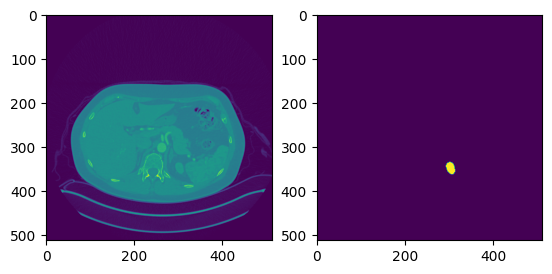

In [83]:
plt.subplot(1,2,1)
plt.imshow(vol[100])
plt.subplot(1,2,2)
plt.imshow(seg[100])

In [84]:
#可以看到该肾脏存在肿瘤，检查其array对应部分值是否为2
#由于上面没有将array打印完整，我们先要求np完整打印数组
np.set_printoptions(threshold=np.inf)

In [85]:
seg[100]
#可以发现对应位置值为1（肿瘤），符合我们的预期

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [5]:
#为了后续方便使用vol和seg，将其保存为png格式
from imageio import imwrite

In [101]:
#imwrite("D:/lumor_segementation/kits19-master/processed_data/example.png",seg[100])

In [89]:
#case_00000 - case_00209 是既有图像又有标签的
#case_00210 - case_00227 只有图像无标签

In [6]:
import os #用于创建文件夹

In [104]:
#处理0-209
load_dir_path = "D:/lumor_segementation/kits19-master/data/"
save_image_dir_path = "D:/lumor_segementation/kits19-master/processed_image/"
save_segmen_dir_path = "D:/lumor_segementation/kits19-master/processed_segmen/"
for index in range(210):
    case_path = "case_{:05d}".format(index)
    vol = nib.load(load_dir_path + case_path + "/imaging.nii.gz")
    seg = nib.load(load_dir_path + case_path + "/segmentation.nii.gz")
    print("processing case({:01d})".format(index))
    if(vol.shape[0] != seg.shape[0]):
        print("wrong, num of per vol != seg")
        break
    else:
        print("case ", index, " including ", vol.shape[0], "image and segmentation")
    
    #get_data
    vol = vol.get_data()
    seg = seg.get_data()
    vol = vol.astype(np.uint8)       #保存时有一定损失
    seg = seg.astype(np.uint8)
    
    #save
    #创建文件夹
    os.makedirs(save_image_dir_path + case_path)
    os.makedirs(save_segmen_dir_path + case_path)
    for pic_num in range(seg.shape[0]):
        save_image_path = save_image_dir_path + case_path + "/image{:05d}.png".format(pic_num)
        imwrite(save_image_path,vol[pic_num])
        save_segmen_path = save_segmen_dir_path + case_path + "/segmentation{:05d}.png".format(pic_num)
        imwrite(save_segmen_path,seg[pic_num])

processing case(0)
case  0  including  611 image and segmentation


D:\Anaconda\Anaconda_setup\envs\malning\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  app.launch_new_instance()
D:\Anaconda\Anaconda_setup\envs\malning\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


processing case(1)
case  1  including  602 image and segmentation
processing case(2)
case  2  including  261 image and segmentation
processing case(3)
case  3  including  270 image and segmentation
processing case(4)
case  4  including  64 image and segmentation
processing case(5)
case  5  including  834 image and segmentation
processing case(6)
case  6  including  157 image and segmentation
processing case(7)
case  7  including  61 image and segmentation
processing case(8)
case  8  including  227 image and segmentation
processing case(9)
case  9  including  77 image and segmentation
processing case(10)
case  10  including  50 image and segmentation
processing case(11)
case  11  including  80 image and segmentation
processing case(12)
case  12  including  89 image and segmentation
processing case(13)
case  13  including  92 image and segmentation
processing case(14)
case  14  including  439 image and segmentation
processing case(15)
case  15  including  75 image and segmentation
proces

EOFError: Compressed file ended before the end-of-stream marker was reached

In [9]:
#处理用于测试的210-227
#处理0-209
load_dir_path = "D:/lumor_segementation/kits19-master/data/"
save_image_dir_path = "D:/lumor_segementation/kits19-master/final_test/"

index = 210
while index <= 227:
    case_path = "case_{:05d}".format(index)
    vol = nib.load(load_dir_path + case_path + "/imaging.nii.gz")
    print("processing case({:01d})".format(index))
    print("case ", index, " including ", vol.shape[0], "images")
    
    #get_data
    vol = vol.get_data()
    vol = vol.astype(np.uint8)       #保存时有一定损失
    
    #save
    #创建文件夹
    os.makedirs(save_image_dir_path + case_path)
    for pic_num in range(vol.shape[0]):
        save_image_path = save_image_dir_path + case_path + "/image{:05d}.png".format(pic_num)
        imwrite(save_image_path,vol[pic_num])
        
    index = index + 1

processing case(210)
case  210  including  42 images


D:\Anaconda\Anaconda_setup\envs\malning\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


processing case(211)
case  211  including  95 images
processing case(212)
case  212  including  87 images
processing case(213)
case  213  including  636 images
processing case(214)
case  214  including  505 images
processing case(215)
case  215  including  82 images
processing case(216)
case  216  including  743 images
processing case(217)
case  217  including  139 images
processing case(218)
case  218  including  164 images
processing case(219)
case  219  including  167 images
processing case(220)
case  220  including  174 images
processing case(221)
case  221  including  141 images
processing case(222)
case  222  including  91 images
processing case(223)
case  223  including  479 images
processing case(224)
case  224  including  97 images
processing case(225)
case  225  including  103 images
processing case(226)
case  226  including  160 images
processing case(227)
case  227  including  145 images
